# ** Algoritmo Metropolis para un modelo lineal**

Ajuste usando minimos cuadrados
b,m = [ 32.00396939   2.191028  ]



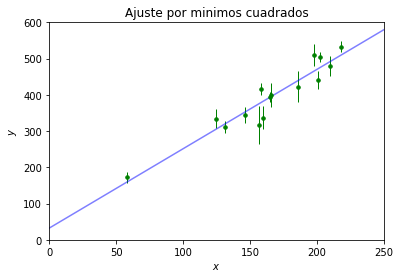

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline 

# Datos que ajustaremos
#  x, y, sigma_y
data1 = np.array([[201,592,61],[244,401,25],[47,583,38],[287,402,15],[203,495,21],
                  [58,173,15],[210,479,27],[202,504,14],[198,510,30],[158,416,16],
                  [165,393,14],[201,442,25],[157,317,52],[131,311,16],[166,400,34],
                  [160,337,31],[186,423,42],[125,334,26],[218,533,16],[146,344,22]])

# Limites de las graficas
xlimits = [0,250]
ylimits = [0,600]
title_prefix = 'Problem set 1'
plot_format = '.png'

def get_data():
    # Obtener los primeros 5 datos de x, y, sigma_y que agrupamos en data1
    x = data1[5:,0]
    y = data1[5:,1]
    sigmay = data1[5:,2]
    return (x, y, sigmay)

# Funcion para graficar las barras de error de los datos
def plot_yerr(x, y, sigmay):
    plt.errorbar(x, y, yerr=sigmay, fmt='.', ms=7, lw=1, color='g')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.xlim(*xlimits)
    plt.ylim(*ylimits)
    plt.title(title_prefix)

# Modelo lineal   y = mx + b.
def plot_line(b, m, **kwargs):
    x = np.array(xlimits)
    y = m*x + b
    p = plt.plot(x, y, 'b-', alpha=0.5, **kwargs)
    plt.xlim(*xlimits)
    plt.ylim(*ylimits)
    return p

# Método de minimos cuadrados, regresa los mejores valores (m, b)
def leastsq(x, y):
    print 'Ajuste usando minimos cuadrados'
    # numero depuntos
    N = len(x)
    # construyendo matriz
    X = np.zeros((N,2))
    X[:,0] = 1.
    X[:,1] = x
    #print 'X shape:', X.shape
    XTX = np.dot(X.T, X)
    #print 'XTX shape:', XTX.shape
    XTy = np.dot(X.T, y)
    #print 'XTy shape:', XTy.shape
    beta = np.dot(np.linalg.inv(XTX), XTy)
    print 'b,m =', beta
    (m, b) = beta
    print
    return (m, b)

# A continuacion se presentan un primer analisis de los datos

(x, y, sigmay) = get_data() 

# Graficar los puntos 
plot_yerr(x, y, sigmay)
# save just the data points plot \\plt.savefig('p1-data' + plot_format)

# Solucion de m y b con minimos cuadrados ignorando el error de y.
(m, b) = leastsq(x, y)
plot_line(m, b)
plt.title('Ajuste por minimos cuadrados')


def pruebalikehood():
    (x, y, sigmay) = get_data()
    (m,b) = (2.2, 30)
    print 'Likelihood at', (m,b), 'is', straight_line_gaussian_likelihood(x, y, sigmay, m, b)
    print 'Log-likelihood at', (m,b), 'is', straight_line_gaussian_loglikelihood(x, y, sigmay, m, b)

## ** Ahora realizaremos el ajuste usando el algoritmo de Metropolis **

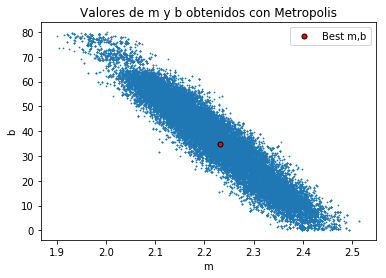

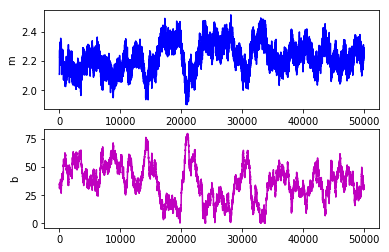

In [2]:
# Definimos la funcion likehood gaussiana para una linea
def straight_line_gaussian_likelihood(x, y, sigmay, m, b):
    return np.prod(1./(np.sqrt(2.*np.pi) * sigmay) * np.exp(-(y - (m * x + b))**2 / (2. * sigmay**2)))

# Definimos el prior
def prior(m,b):
    if ((0 < m <3) and (0< b <80)):
        p = 0.
        return p 
    else:
        p = -np.infty
        return p
    return p

# Valores iniciales para m y b, son valores propuestos
m = 2.1
b = 32
# Tamaño de los pasos (sigmas)
step_m = 0.1
step_b = 1.

# Numero de pasos
steps = 50000

    
# Obtener los datos
(x, y, sigmay) = get_data()

chain = []
probs = []
    
for i in range(steps):
        # Obteniendo un valor aleatorio normalizado de m y b
        mnew = np.random.normal(m,step_m)
        bnew = np.random.normal(b,step_b)
        
        # Realizamos un primer filtro de los datos
        if (prior(mnew,bnew)):
            mnew = m
            bnew = b
            
        # Evaluando la probabilidad con los nuevos m y b
        prob_new = straight_line_gaussian_likelihood(x, y, sigmay, mnew, bnew)
        # Evaluando probabilidad de m y b iniciales
        prob_old = straight_line_gaussian_likelihood(x, y, sigmay, m, b)

        # Comparando las probabilidades para decidir cuales valores de m aceptar 
        if (prob_new/prob_old > 1):
            m = mnew
            b = bnew
            prob = prob_new
        else:
            prob_test = np.random.uniform(0,1)
            if (prob_test> prob_new/prob_old):
                m = m
                b = b
                prob = prob_old
            else:
                m = mnew
                b = bnew
                prob = prob_new

        # Guardando los valores de m y b
        chain.append((m,b))
        # Guardando el valor de la probabilidad (likehood)
        probs.append(prob)

mm = [m for m,b in chain]
bb = [b for m,b in chain]

# Obteniendo los mejores valores de m, b cnon la probabilidad
besti = np.argmax(probs)
bestm = mm[besti]
bestb = bb[besti]
    
# Graficando los valores de m y b
plt.scatter(mm, bb, s=3, lw = 0)

# Mejor valor obtenido de m y b
plt.plot(bestm, bestb, 'ko', label='Best m,b',markersize=5, markerfacecolor='r')
plt.xlabel('m')
plt.ylabel('b')
plt.title('Valores de m y b obtenidos con Metropolis')
plt.legend()
plt.show()

plt.clf()
plt.subplot(2,1,1)
plt.plot(mm, 'b-')
plt.ylabel('m')
plt.subplot(2,1,2)
plt.plot(bb, 'm-')
plt.ylabel('b')
plt.show()    
    #import triangle
    #plt.clf()
    #triangle.corner(chain, labels=['m', 'b'],
    #                truths=[bestm,bestb])
    #plt.savefig('p3-tri.png')



## Presentamos el histograma de los datos m y b 

media m:  2.22363127608
desviacion estandar m:  0.0959038758286
total de cuentas:  50000
error estandar:  1.91807751657e-06



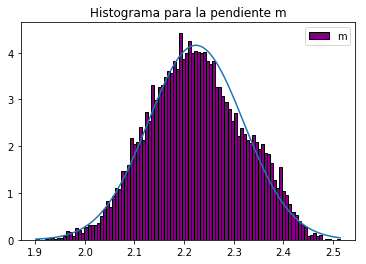

media b:  36.4323635516
desviacion estandar:  15.7393897294
total de cuentas:  50000
error estandar:  0.000314787794587



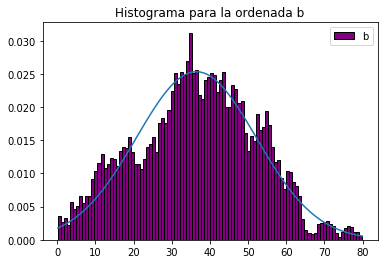

In [3]:
# Definiendo curva gaussiana
def gauss(mu,sigma,bins):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )

# Numero de intervalos para el histograma
intervalos = 100

# Datos m
mu=np.mean(mm) # media
sigma=np.std(mm) #desviación estándar
N=len(mm) # número de cuentas
std_err = sigma / N # error estándar

# muestro estos resultados
print 'media m: ', mu
print 'desviacion estandar m: ', sigma
print 'total de cuentas: ', N
print 'error estandar: ', std_err
print

# Graficando histograma normalizado con gaussiana
count, bins, ignored = plt.hist(mm,bins = intervalos, normed= 1, label='m',color='purple',edgecolor = 'black',  linewidth=1)
plt.title('Histograma para la pendiente m')
plt.plot(bins,gauss(mu,sigma,bins))
plt.legend()
plt.show()

mu=np.mean(bb) # media
sigma=np.std(bb) #desviación estándar
N=len(bb) # número de cuentas
std_err = sigma / N # error estándar

# muestro estos resultados
print 'media b: ', mu
print 'desviacion estandar: ', sigma
print 'total de cuentas: ', N
print 'error estandar: ', std_err
print

count, bins, ignored = plt.hist(bb,bins = intervalos, normed= True, label='b',color='purple',edgecolor = 'black',  linewidth=1)
plt.title('Histograma para la ordenada b')
plt.plot(bins,gauss(mu,sigma,bins))
plt.legend()
plt.show()